In [4]:
# NN to recognize hand-written digits using the MNIST data
using DelimitedFiles
using StatsBase
using Distributions
using LinearAlgebra

# read the MNIST data
const testx = readdlm("testx.csv", ',', Int, '\n')
const testy = readdlm("testy.csv", ',', Int, '\n')
const trainx = readdlm("trainx.csv", ',', Int, '\n')
const trainy = readdlm("trainy.csv", ',', Int, '\n')

const L = 3                 # number of layers including input and output
const sizes = [784, 30, 10] # number of neurons in each layer

# the activation function
@. f(z) = 1/(1 + exp(-z))      # sigmoid activation
@. fprime(z) = f(z) * (1-f(z))

# convert a digit d to a 10-element vector
# e.g. 6 is converted to [0,0,0,0,0,0,1,0,0,0]
function digit2vector(d)
    vcat( repeat([0], d), 1, repeat([0], 9-d) )
end

# a feedforward function that returns the activations
# from each layer and the weighted inputs to each layer
# so that they can be used during backpropagation.
# W,b contain the weights, biases in the network.
# x is the input of a single training example (a vector of length 784).
function feedforward(W, b, x)
    # TO BE COMPLETED.
    z = [zeros(sizes[1]), zeros(sizes[2]), zeros(sizes[3])]
    a = [zeros(sizes[1]), zeros(sizes[2]), zeros(sizes[3])] 
    a[1] = x
    z[2] = W[1] * a[1] .+ b[1]
    a[2] = f(z[2])
    z[3] = W[2] * a[2] .+ b[2]
    a[3] = f(z[3])
    return a, z
end

# given an input vector, return the predicted digit
function classify(W, b, x)
    # TO BE COMPLETED.
    (a, z) = feedforward(W, b, x)
    j = 0
    max = 0
    for i in 1:length(a[3])
        if a[3][i] >= max
            max = a[3][i]
            j = i - 1
        end
    end
    return j
end

# helper function for backprop().
# this function computes the error for a single training example.
# W contains the weights in the network.
# a contains the activations.
# z contains the weighted inputs.
# y is the correct digit.
# returns δ = the error. the size of δ is [ 784, 30, 10 ]
function compute_error(W, a, z, y)
    δ = [ zeros(sizes[1]), zeros(sizes[2]), zeros(sizes[3]) ]
    # note that δ[1] is junk. we put it there so that the indices make sense.

    # at the output layer L
    δ[3] = -(digit2vector(y) .- a[3]) .* fprime(z[3])

    # for each earlier layer L-1,L-2,..,2 (for the HW, this means only layer 2)
    δ[2] = W[2]' * δ[3] .* fprime(z[2])

    return δ
end

# helper function for backprop(). given the errors δ and the
# activations a for a single training example, this function returns
# the gradient components ∇W and ∇b.
# this function implements teh equations BP3 and BP4.
function compute_gradients(δ, a)
    # TO BE COMPLETED.
    ∇W = [δ[2] .* a[1]', δ[3] .* a[2]']
    ∇b = [δ[2], δ[3]]
    return ∇W, ∇b
end

# backpropagation. returns ∇W and ∇b for a single training example.
function backprop(W, b, x, y)
    (a, z) = feedforward(W, b, x)
    δ = compute_error(W, a, z, y)
    (∇W, ∇b) = compute_gradients(δ, a)
    return ∇W, ∇b
end

# gradient descent algorithm.
# W = weights in the network
# b = biases in the network
# batch = the indices of the observations in the batch, i.e. the rows of trainx
# α = step size
# λ = regularization parameter
function GD(W, b, batch; α=0.01, λ=0.01)
    m = length(batch)    # batch size

    # data structure to accumulate the sum over the batch.
    # in the notes and in Ng's article sumW is ΔW and sumb is Δb.
    sumW = [ zeros(sizes[2], sizes[1]),
             zeros(sizes[3], sizes[2]) ]
    sumb = [ zeros(sizes[2]), zeros(sizes[3]) ]

    # for each training example in the batch, use backprop
    # to compute the gradients and add them to the sum

    # THIS FUNCTION IS INCOMPLETE.

    # make the update to the weights and biases and take a step
    # of gradient descent. note that we use the average gradient.

    # return the updated weights and biases. we also return the gradients
    
    for i in batch
        (∇W, ∇b) = backprop(W, b, trainx[i,:], trainy[i])  #Computed Gradients for this particular batch
        sumW = sumW + ∇W
        sumb = sumb + ∇b
    end
    
    W[1] = W[1] - α*(sumW[1]/m + W[1]*λ)
    W[2] = W[2] - α*(sumW[2]/m + W[2]*λ)
    b[1] = b[1] - α*sumb[1]/m
    b[2] = b[2] - α*sumb[2]/m
    
    ∇W = sumW / m
    ∇b = sumb / m
    
    return W, b, ∇W, ∇b
end

# classify the test data and compute the classification accuracy
function accuracy(W, b) 
    ntest = length(testy)
    yhat = zeros(Int, ntest)
    for i in 1:ntest
        yhat[i] = classify(W, b, testx[i,:])
    end
    sum(testy .== yhat)/ntest # hit rate
end

# train the neural network using batch gradient descent.
# this is a driver function to repeatedly call GD().
# N = number of observations in the training data.
# m = batch size
# α = learning rate / step size
# λ = regularization parameter
function BGD(N, m, epochs; α=0.01, λ=0.01) 
    # random initialization of the weights and biases
    d = Normal(0, 1)
    W = [ rand(d, sizes[2], sizes[1]),  # layer 1 to 2
          rand(d, sizes[3], sizes[2]) ] # layer 2 to 3
    b = [ rand(d, sizes[2]),   # layer 2
          rand(d, sizes[3]) ]  # layer 3
    ∇W = [ zeros(sizes[2], sizes[1]),  # layer 1 to 2
          zeros(sizes[3], sizes[2]) ] # layer 2 to 3
    ∇b = [ zeros(sizes[2]),   # layer 2
          zeros(sizes[3]) ]   # layer 3

    # THIS FUNCTION IS INCOMPLETE.
    #
    # you should print out messages to monitor the progress of the
    # training. for example, you could print the epoch number and the
    # accuracy after completion of each epoch.
    
    for i in 1:epochs 
        left = 1:N
        while (length(left) > 0)
            batch = sample(left, m, replace=false)
            left = setdiff(left, batch)
            (W, b, ∇W, ∇b) = GD(W, b, batch) 
        end
        println("Epoch: ", i, " Accuracy: ", accuracy(W,b))
    end
    
    return W, b, ∇W, ∇b
end

# some tuning parameters
N = length(trainy)
m = 20       # batch size
epochs = 15  # number of complete passes through the training data
α = 0.01     # learning rate / step size
λ = 0.01      # regularization parameter
W, b, ∇W, ∇b = BGD(N, m, epochs, α=α, λ=λ)

Epoch: 1 Accuracy: 0.1461
Epoch: 2 Accuracy: 0.2012
Epoch: 3 Accuracy: 0.3005
Epoch: 4 Accuracy: 0.4151
Epoch: 5 Accuracy: 0.5207
Epoch: 6 Accuracy: 0.5877
Epoch: 7 Accuracy: 0.6418
Epoch: 8 Accuracy: 0.7143
Epoch: 9 Accuracy: 0.7885
Epoch: 10 Accuracy: 0.8305
Epoch: 11 Accuracy: 0.8617
Epoch: 12 Accuracy: 0.8769
Epoch: 13 Accuracy: 0.8908
Epoch: 14 Accuracy: 0.8962
Epoch: 15 Accuracy: 0.898


([[-0.010468508506137146 -0.011538757394404808 … 0.008435078599423107 0.003096696779047387; -0.005715306358008706 -0.0038725276768873146 … 0.00199792459523197 0.0003371080965898283; … ; -0.019028514527528042 -0.007813698409510964 … 0.0039562650049357545 0.010978286210430222; -0.0058828833896159794 -0.008000682808937527 … -0.011487296535067242 0.01332614228238889], [-0.09066617647243465 -0.2722405920058979 … -0.020680501152838673 -0.3223136739114536; -0.013747304675321583 -0.203968766229709 … -0.03895858835066818 0.12539038113065643; … ; -0.15907644518101918 0.28836191110303727 … -0.1279285229407779 0.1480181607691054; -0.055441267069800196 0.1279120164780309 … -0.007321537829448228 0.29084134238991177]], [[1.2875031827610113, -0.22662582902802084, -0.6551785825247117, -0.2925440154936923, 0.7869421832736346, -0.597549974796955, -2.0175074842143443, 0.41848642827465266, -1.57111887048256, -0.10212836773366939  …  -0.17162453096508506, 1.682882201955982, 0.9680272212666686, -0.0224307285

In [11]:
for i in 1:6
    print(classify(W, b, testx[i,:]), " \n")
end

7 
2 
1 
0 
4 
1 


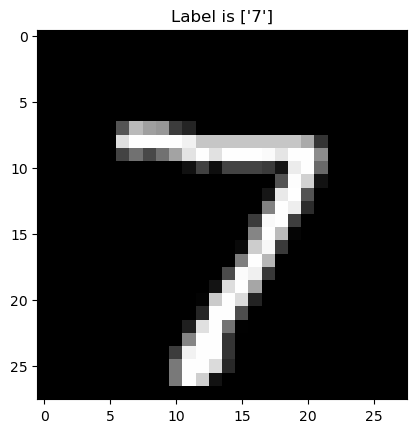

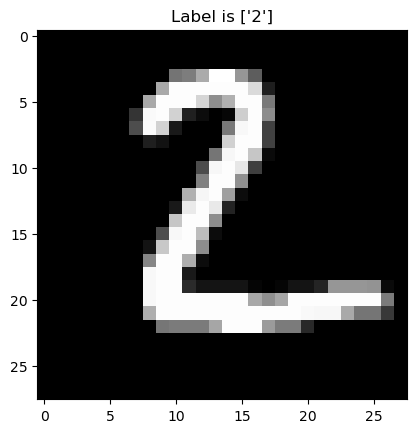

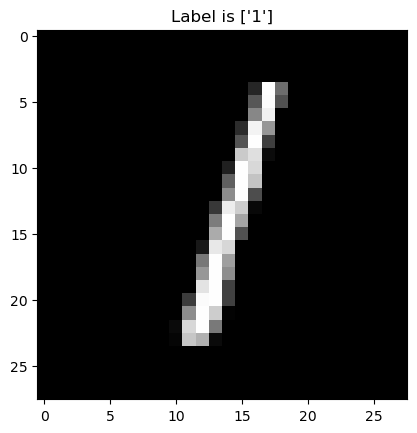

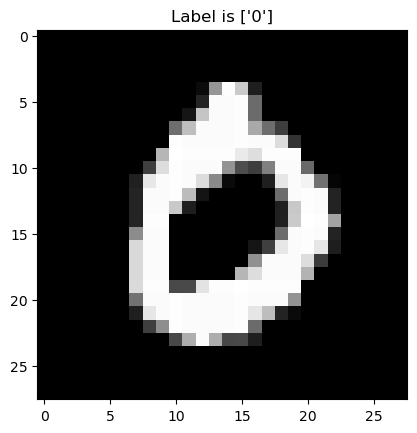

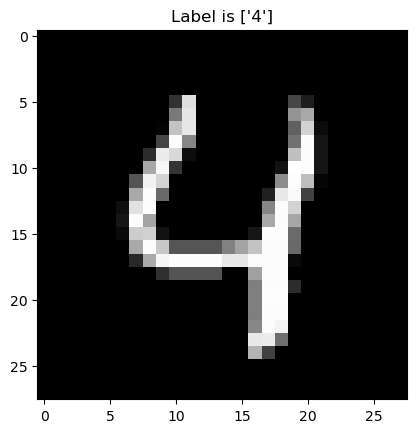

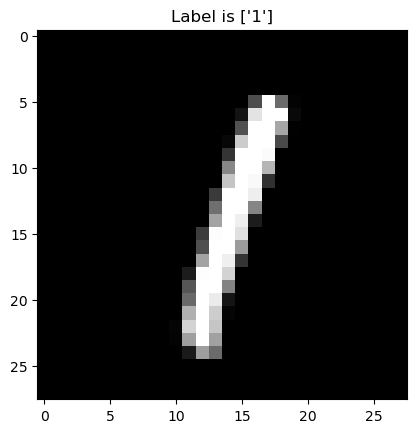

In [17]:
import numpy as np
import csv
import matplotlib.pyplot as plt

count = 0

with open('testy.csv', 'r') as label_file:
    labels = list(csv.reader(label_file))

with open('testx.csv', 'r') as test_file:
    for data in csv.reader(test_file):
        count += 1
        # The first column is the label
        label = labels[count - 1]

        # The rest of columns are pixels
        pixels = np.array(data[0:])
        pixels = pixels.reshape(28, 28)

        # Make those columns into a array of 8-bits pixels
        # This array will be of 1D with length 784
        # The pixel intensity values are integers from 0 to 255
        pixels = np.array(pixels, dtype='uint8')

        # Reshape the array into 28 x 28 array (2-dimensional array)
        pixels = pixels.reshape((28, 28))

        # Plot
        plt.title('Label is {label}'.format(label=label))
        plt.imshow(pixels, cmap='gray')
        plt.show()
        if count > 5:
            break # Just want count examples

Here we can see that our network does achieve an accuracy that is slightly above 90% and stays relatively close to that level of accuracy.  